### Se trata de explorar con estos datos las tecnicas de clasificacion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Select the dataset

In [3]:
import kagglehub
import os

In [4]:
# To check the Kaggle Databases Guide check the page: https://www.kaggle.com/datasets 
path = kagglehub.dataset_download("bhumikatandon/diabetes-classification-dataset")
#path=kagglehub.dataset_download('bricevergnou/spotify-recommendation')
#path=kagglehub.dataset_download("stealthtechnologies/predict-student-performance-dataset", path='data.csv')
#print(os.listdir(path))

100%|██████████████████████████████████████| 9.57k/9.57k [00:00<00:00, 7.59MB/s]

Extracting files...


In [5]:
aux = [name for name in os.listdir(path) if ".csv" in name][0]
path = os.path.join(path,aux)
data =  pd.read_csv(path)

In [6]:
data.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_preg             768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   bp                   768 non-null    int64  
 3   tricepsthickness     768 non-null    int64  
 4   insulin              768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   pedigree_func        768 non-null    float64
 7   age                  768 non-null    int64  
 8   target               768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [9]:
#diabetes-classification-dataset
y = data['target']  # Columna 'class' como variable objetivo
X = data.drop('target', axis=1)  # Eliminar la columna 'class' del resto de los datos

In [10]:
# Representacion numerica de los valores categoricos
#encoder = LabelEncoder()
# Codificar todas las columnas categóricas 
#X = X.apply(encoder.fit_transform)

In [11]:
X.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Split the dataset into training and testing sets.

In [12]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the Support Vector Machine model.

In [13]:
# Normalizacion de los datos
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [14]:
from sklearn.svm import SVC

In [15]:
# Create a list of regularization parameter values
C_values = [0.01, 0.1, 1, 10, 100]

# Create an empty dictionary to store the results
results = {}

# Train SVM models with different C values
for C in C_values:
    svm_model = SVC(C=C, kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C] = {
        'model': svm_model,
        'accuracy': accuracy
    }


## Print the results of the classification.

In [16]:
# Print the results of the classification
print("Results of SVM Classification:")
for C, result in results.items():
    print(f"C = {C}, Accuracy: {result['accuracy']:.4f}")


Results of SVM Classification:
C = 0.01, Accuracy: 0.7338
C = 0.1, Accuracy: 0.7532
C = 1, Accuracy: 0.7532
C = 10, Accuracy: 0.7662
C = 100, Accuracy: 0.7468


## Visualize the prediction results

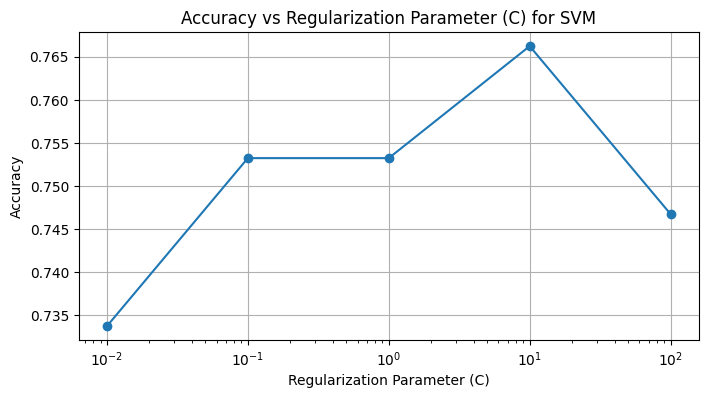

In [17]:
# Visualize the accuracy vs regularization parameter (C)
accuracies = [result['accuracy'] for C, result in results.items()]

plt.figure(figsize=(8, 4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter (C) for SVM')
plt.grid(True)
plt.show()